Task-04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

##### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

##### Load Dataset

In [4]:
df = pd.read_csv(r'twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


##### Data preprocessing

In [6]:
column_names = ['tweet_id','topic','sentiment_label','text']
column_names

['tweet_id', 'topic', 'sentiment_label', 'text']

In [8]:
df = pd.read_csv(r'twitter_training.csv',names=column_names)
df.head()

,tweet_id,topic,sentiment_label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
# convert all values to string
df ['text'] = df['text'].astype(str)

In [18]:
# replace nan values with empty string
df['text'] = df['text'].fillna('')

In [19]:
print('Unique topics : ',df['topic'].nunique())

Unique topics :  32


In [20]:
print(df['sentiment_label'].value_counts())

sentiment_label
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [36]:
# initialize vader for sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [22]:
# Calculate sentiment scores
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))

In [24]:
# compare labeled sentiments with scores
print(df[['sentiment_label','sentiment_scores']].head())

  sentiment_label                                   sentiment_scores
0        Positive  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
1        Positive  {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...
2        Positive  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
3        Positive  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
4        Positive  {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...


##### Visualizing Sentiment patterns

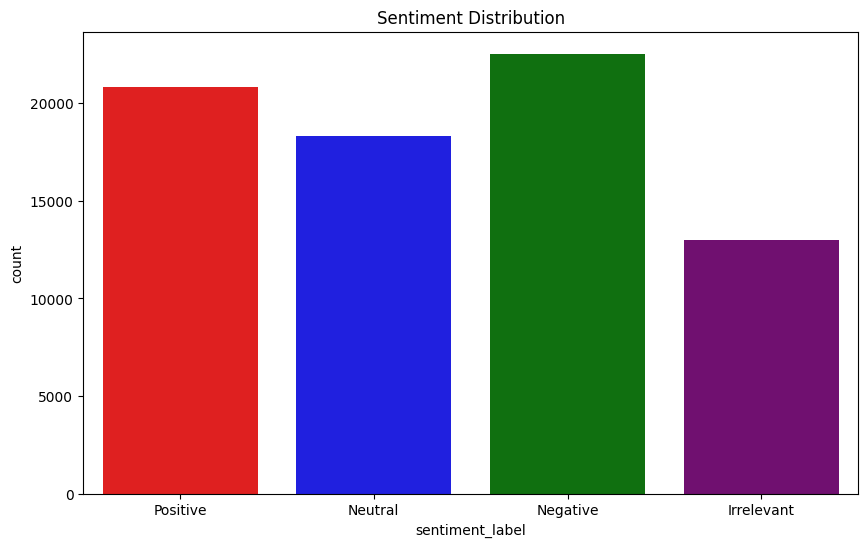

In [28]:
# Sentiment topics
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='sentiment_label', hue='sentiment_label',palette=['red','blue','green','purple'], legend=False)
plt.title('Sentiment Distribution')
plt.show()

In [29]:
# word cloud for positive and negative sentiments
positive_text = ' '.join(df[df['sentiment_label'] ==  'Positive']['text'])
negative_text = ' '.join(df[df['sentiment_label'] ==  'Negative']['text'])

In [30]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

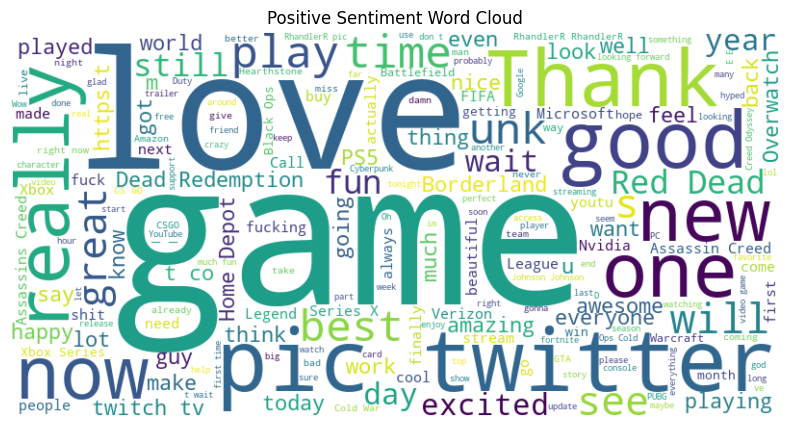

In [31]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()

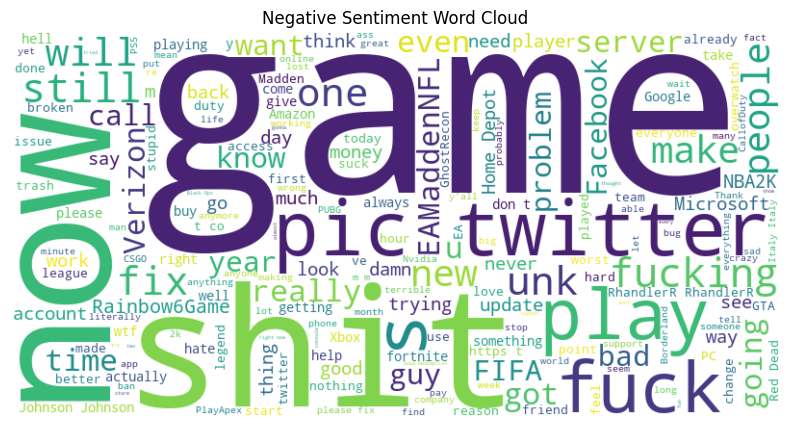

In [32]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()